In [52]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [53]:
import plotly.figure_factory as ff
import plotly.express as px

In [54]:
import seaborn as sns

In [3]:
#pip install chart-studio

In [2]:
import chart_studio.plotly as py
import plotly.tools as tls

In [68]:
vacc = pd.read_csv("Vaccine_Hesitancy_for_COVID-19__County_and_local_estimates.csv")

In [69]:
vacc.head()

,FIPS Code,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,...,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary
0,1079,"Lawrence County, Alabama",ALABAMA,0.1913,0.2762,0.0999,0.50,Moderate Vulnerability,0.80,High Concern,...,0.0219,0.0560,0.0020,0.1058,0.0008,0.7649,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.529795 34.518525, -87.5297...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
1,1107,"Pickens County, Alabama",ALABAMA,0.1825,0.2688,0.0917,0.92,Very High Vulnerability,0.78,High Concern,...,0.0487,0.0014,0.0006,0.3984,0.0006,0.5365,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.29705899999999 33.349083, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
2,1035,"Conecuh County, Alabama",ALABAMA,0.1915,0.2943,0.0963,0.81,Very High Vulnerability,0.89,Very High Concern,...,0.0068,0.0020,0.0045,0.4776,0.0000,0.5005,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.165662 31.542897, -87.1653...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
3,4021,"Pinal County, Arizona",ARIZONA,0.1422,0.2077,0.0877,0.86,Very High Vulnerability,0.87,Very High Concern,...,0.3016,0.0430,0.0158,0.0408,0.0029,0.5679,POINT (-111.664616 34.293239),AZ,"MULTIPOLYGON (((-111.685911 33.204637, -111.61...",MULTIPOLYGON (((-114.516842 33.027885999999995...
4,1067,"Henry County, Alabama",ALABAMA,0.1929,0.2871,0.0996,0.55,Moderate Vulnerability,0.65,High Concern,...,0.0262,0.0018,0.0040,0.2655,0.0010,0.6917,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-85.415774 31.490413, -85.4153...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."


In [6]:
#vacc.describe()

In [70]:
vacc['Probably not'] = vacc["Estimated hesitant"] - vacc["Estimated strongly hesitant"]
vacc['Unsure'] = vacc['Estimated hesitant or unsure']- vacc['Probably not']

In [78]:
vacc.to_csv("Vaccine_Hesitance_2.csv", index= False)

In [71]:
# Histogram showing percent adults strongly hesitant to vaccination
px.histogram(vacc, x="Estimated strongly hesitant", hover_data=vacc.columns)

<AxesSubplot:xlabel='Percent non-Hispanic Black', ylabel='Unsure'>

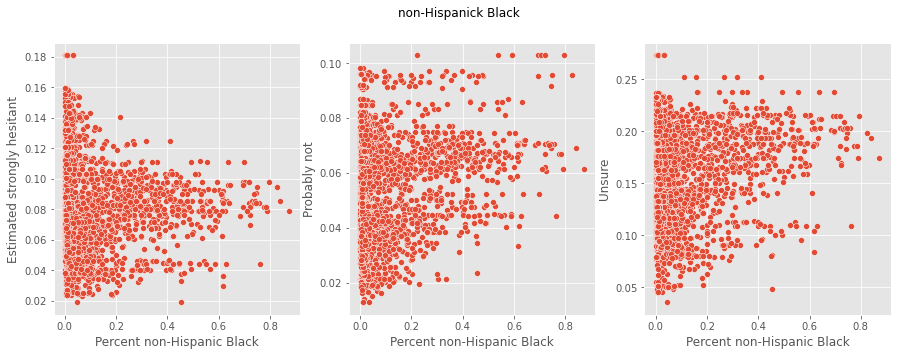

In [105]:
fig, axes = plt.subplots(1,3, figsize =(15,5), sharey =False)
fig.suptitle('non-Hispanick Black')
sns.scatterplot(data=vacc, ax =axes[0], x="Percent non-Hispanic Black", y="Estimated strongly hesitant")
sns.scatterplot(data=vacc, ax =axes[1], x="Percent non-Hispanic Black", y="Probably not")
sns.scatterplot(data=vacc, ax =axes[2], x="Percent non-Hispanic Black", y="Unsure")

In [14]:
vacc['Estimated strongly hesitant'].describe() 

count    3142.000000
mean        0.080259
std         0.028311
min         0.018900
25%         0.062500
50%         0.073950
75%         0.095700
max         0.181100
Name: Estimated strongly hesitant, dtype: float64

In [15]:
#get quartiles of estimated strongly hesitant population
q1, q2, q3 = vacc["Estimated strongly hesitant"].quantile(q=[0.25,0.5,0.75])

#create conditions to put the data in bins for strongly hesitants
conditions =[\
    (vacc["Estimated strongly hesitant"]<=q1),\
    (vacc["Estimated strongly hesitant"]>q1) & (vacc["Estimated strongly hesitant"]<=q2),\
    (vacc["Estimated strongly hesitant"]>q2) & (vacc["Estimated strongly hesitant"]<=q3),\
    (vacc["Estimated strongly hesitant"]>q3) 
            ]
values = [1, 2, 3, 4]
vacc['Definitely not quartile'] =np.select(conditions, values)

<AxesSubplot:xlabel='Percent non-Hispanic Black', ylabel='Social Vulnerability Index (SVI)'>

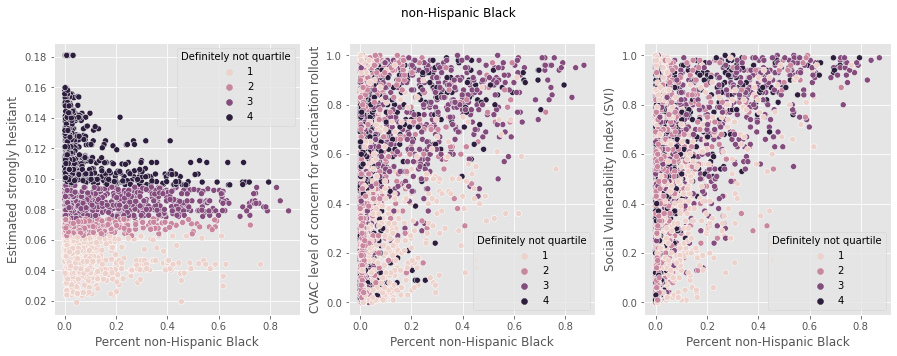

In [16]:
# Plotting non-Hispanic Black percentage in different counties against CVAC, SVI and separating them based on quartiles of strongly hesitant population in these counties
fig, axes = plt.subplots(1,3, figsize =(15,5), sharey =False)
fig.suptitle('non-Hispanic Black')
sns.scatterplot(data=vacc, ax =axes[0], x="Percent non-Hispanic Black", y="Estimated strongly hesitant", hue = "Definitely not quartile")
sns.scatterplot(data=vacc, ax =axes[1], x="Percent non-Hispanic Black", y="CVAC level of concern for vaccination rollout", hue = "Definitely not quartile")
sns.scatterplot(data=vacc, ax =axes[2], x="Percent non-Hispanic Black", y="Social Vulnerability Index (SVI)", hue = "Definitely not quartile")

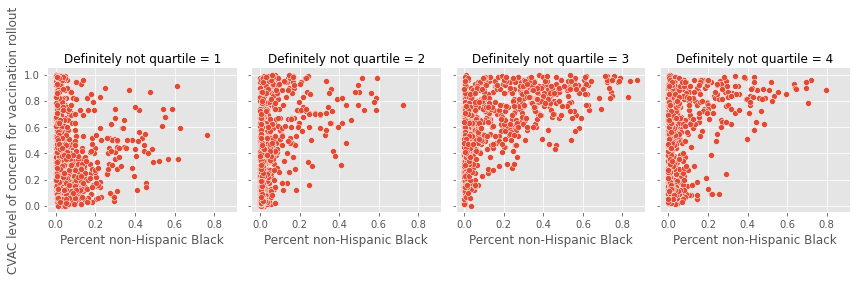

In [18]:
# Further splitting up the "strongly hesitant" quartile data for CVAC level of concern to clearly see the trends
g = sns.FacetGrid(vacc, col="Definitely not quartile")
g.map(sns.scatterplot, "Percent non-Hispanic Black", "CVAC level of concern for vaccination rollout")

In [12]:
vacc['Percent non-Hispanic Black'].describe()
# This shows 50% of the US counties have less than 2.2% non-Hispanic Black constituting their population make up.
#25% of the counties have more than ~10% non-Hispanic Black in their population.

count    3142.000000
mean        0.089259
std         0.144283
min         0.000000
25%         0.006500
50%         0.021900
75%         0.098400
max         0.872300
Name: Percent non-Hispanic Black, dtype: float64

In [72]:
#get quartiles of percent non-Hispanic Black population
q1, q2, q3 = vacc["Percent non-Hispanic Black"].quantile(q=[0.25,0.5,0.75])

#create conditions to split the percent non-Hispanic Black pop in quartile bins to get an idea of composition of counties with respect to % Black pop. 
conditions =[\
    (vacc["Percent non-Hispanic Black"]<=q1),\
    (vacc["Percent non-Hispanic Black"]>q1) & (vacc["Percent non-Hispanic Black"]<=q2),\
    (vacc["Percent non-Hispanic Black"]>q2) & (vacc["Percent non-Hispanic Black"]<=q3),\
    (vacc["Percent non-Hispanic Black"]>q3) 
            ]
values = [1, 2, 3, 4]
vacc['non-Hispanic Black quartile'] =np.select(conditions, values)

<AxesSubplot:xlabel='non-Hispanic Black quartile', ylabel='CVAC level of concern for vaccination rollout'>

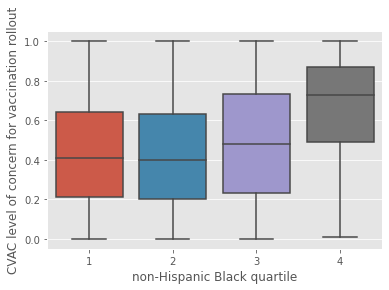

In [15]:
sns.boxplot(x='non-Hispanic Black quartile', y='CVAC level of concern for vaccination rollout', data=vacc)
# this shows that in the first 2 quartile of black population, which is where our 50% counties reside, there is not much difference in the CVAc level of concern.
# However, in the 4th quartile of Black population where this ethnic group forms greater than 10% share of the population in respective counties,
# the CVAC level of concern is markedly different.

In [73]:
#get quartiles of percent Hispanic population
h1, h2, h3 = vacc["Percent Hispanic"].quantile(q=[0.25,0.5,0.75])

#create conditions to split the percent Hispanic pop in quartile bins to get an idea of composition of counties with respect to % Hispanic pop. 
conditions =[\
    (vacc["Percent Hispanic"]<=h1),\
    (vacc["Percent Hispanic"]>h1) & (vacc["Percent Hispanic"]<=h2),\
    (vacc["Percent Hispanic"]>h2) & (vacc["Percent Hispanic"]<=h3),\
    (vacc["Percent Hispanic"]>h3) 
            ]
values = [1, 2, 3, 4]
vacc['Hispanic quartile'] =np.select(conditions, values)

In [33]:
vacc['Percent Hispanic'].describe()

count    3142.000000
mean        0.094184
std         0.138647
min         0.000000
25%         0.022200
50%         0.042300
75%         0.096800
max         0.991700
Name: Percent Hispanic, dtype: float64

<AxesSubplot:xlabel='Hispanic quartile', ylabel='CVAC level of concern for vaccination rollout'>

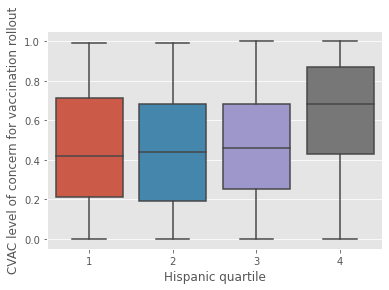

In [34]:
sns.boxplot(x='Hispanic quartile', y='CVAC level of concern for vaccination rollout', data=vacc)

In [74]:
#get quartiles of percent non-Hispanic Asian population
a1, a2, a3 = vacc["Percent non-Hispanic Asian"].quantile(q=[0.25,0.5,0.75])

#create conditions to split the percent non-Hispanic Asian pop in quartile bins to get an idea of composition of counties with respect to % Hispanic pop. 
conditions =[\
    (vacc["Percent non-Hispanic Asian"]<=a1),\
    (vacc["Percent non-Hispanic Asian"]>a1) & (vacc["Percent non-Hispanic Asian"]<=a2),\
    (vacc["Percent non-Hispanic Asian"]>a2) & (vacc["Percent non-Hispanic Asian"]<=a3),\
    (vacc["Percent non-Hispanic Asian"]>a3) 
            ]
values = [1, 2, 3, 4]
vacc['non-Hispanic Asian quartile'] =np.select(conditions, values)

<AxesSubplot:xlabel='non-Hispanic Asian quartile', ylabel='CVAC level of concern for vaccination rollout'>

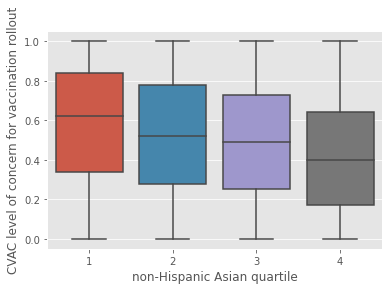

In [37]:
sns.boxplot(x='non-Hispanic Asian quartile', y='CVAC level of concern for vaccination rollout', data=vacc)

In [38]:
vacc['Percent non-Hispanic Asian'].describe()

count    3142.000000
mean        0.013621
std         0.027665
min         0.000000
25%         0.002800
50%         0.006100
75%         0.012800
max         0.417300
Name: Percent non-Hispanic Asian, dtype: float64

In [24]:
vacc.to_csv("Vaccine_Hesitance_2.csv", index= False)

In [75]:
#get quartiles of percent non-Hispanic American Indian/Alaska Native population
ai1, ai2, ai3 = vacc["Percent non-Hispanic American Indian/Alaska Native"].quantile(q=[0.25,0.5,0.75])

#create conditions to split the non-Hispanic American Indian/Alaska Native pop in quartile bins to get an idea of composition of counties with respect to % Hispanic pop. 
conditions =[\
    (vacc["Percent non-Hispanic American Indian/Alaska Native"]<=ai1),\
    (vacc["Percent non-Hispanic American Indian/Alaska Native"]>ai1) & (vacc["Percent non-Hispanic American Indian/Alaska Native"]<=ai2),\
    (vacc["Percent non-Hispanic American Indian/Alaska Native"]>ai2) & (vacc["Percent non-Hispanic American Indian/Alaska Native"]<=ai3),\
    (vacc["Percent non-Hispanic American Indian/Alaska Native"]>ai3) 
            ]
values = [1, 2, 3, 4]
vacc['non-Hispanic American Indian quartile'] =np.select(conditions, values)

<AxesSubplot:xlabel='non-Hispanic American Indian quartile', ylabel='CVAC level of concern for vaccination rollout'>

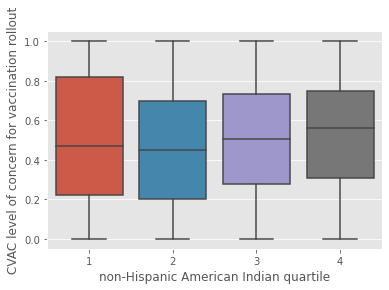

In [40]:
sns.boxplot(x='non-Hispanic American Indian quartile', y='CVAC level of concern for vaccination rollout', data=vacc)

In [41]:
vacc['Percent non-Hispanic American Indian/Alaska Native'].describe()

count    3142.000000
mean        0.018463
std         0.076340
min         0.000000
25%         0.001200
50%         0.002800
75%         0.006900
max         0.919000
Name: Percent non-Hispanic American Indian/Alaska Native, dtype: float64

In [76]:
#get quartiles of Percent non-Hispanic Native Hawaiian/Pacific Islander population
nh1, nh2, nh3 = vacc["Percent non-Hispanic Native Hawaiian/Pacific Islander"].quantile(q=[0.25,0.5,0.75])

#create conditions to split the Percent non-Hispanic Native Hawaiian/Pacific Islander pop in quartile bins to get an idea of composition of counties with respect to % Hispanic pop. 
conditions =[\
    (vacc["Percent non-Hispanic Native Hawaiian/Pacific Islander"]<=nh1),\
    (vacc["Percent non-Hispanic Native Hawaiian/Pacific Islander"]>nh1) & (vacc["Percent non-Hispanic Native Hawaiian/Pacific Islander"]<=nh2),\
    (vacc["Percent non-Hispanic Native Hawaiian/Pacific Islander"]>nh2) & (vacc["Percent non-Hispanic Native Hawaiian/Pacific Islander"]<=nh3),\
    (vacc["Percent non-Hispanic Native Hawaiian/Pacific Islander"]>nh3) 
            ]
values = [1, 2, 3, 4]
vacc['non-Hispanic Native Hawaiian quartile'] =np.select(conditions, values)

<AxesSubplot:xlabel='non-Hispanic Native Hawaiian quartile', ylabel='CVAC level of concern for vaccination rollout'>

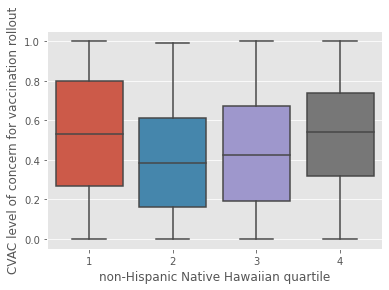

In [43]:
sns.boxplot(x='non-Hispanic Native Hawaiian quartile', y='CVAC level of concern for vaccination rollout', data=vacc)

In [44]:
vacc['Percent non-Hispanic Native Hawaiian/Pacific Islander'].describe()

count    3142.000000
mean        0.000919
std         0.006240
min         0.000000
25%         0.000000
50%         0.000100
75%         0.000600
max         0.272700
Name: Percent non-Hispanic Native Hawaiian/Pacific Islander, dtype: float64

In [80]:
#get quartiles of Percent non-Hispanic White population
w1, w2, w3 = vacc["Percent non-Hispanic White"].quantile(q=[0.25,0.5,0.75])

#create conditions to split the Percent non-Hispanic White pop in quartile bins to get an idea of composition of counties with respect to % Hispanic pop. 
conditions =[\
    (vacc["Percent non-Hispanic White"]<=w1),\
    (vacc["Percent non-Hispanic White"]>w1) & (vacc["Percent non-Hispanic White"]<=w2),\
    (vacc["Percent non-Hispanic White"]>w2) & (vacc["Percent non-Hispanic White"]<=w3),\
    (vacc["Percent non-Hispanic White"]>w3) 
            ]
values = [1, 2, 3, 4]
vacc['non-Hispanic White quartile'] =np.select(conditions, values)

<AxesSubplot:xlabel='non-Hispanic White quartile', ylabel='CVAC level of concern for vaccination rollout'>

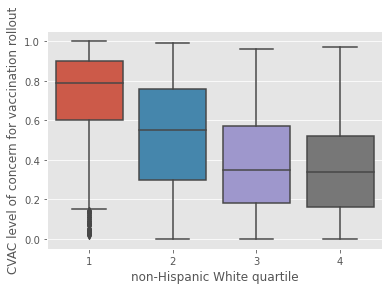

In [46]:
sns.boxplot(x='non-Hispanic White quartile', y='CVAC level of concern for vaccination rollout', data=vacc)

In [47]:
vacc['Percent non-Hispanic White'].describe()

count    3142.000000
mean        0.762499
std         0.202157
min         0.006900
25%         0.644450
50%         0.837400
75%         0.924875
max         1.000000
Name: Percent non-Hispanic White, dtype: float64

<AxesSubplot:xlabel='non-Hispanic Native Hawaiian quartile', ylabel='CVAC level of concern for vaccination rollout'>

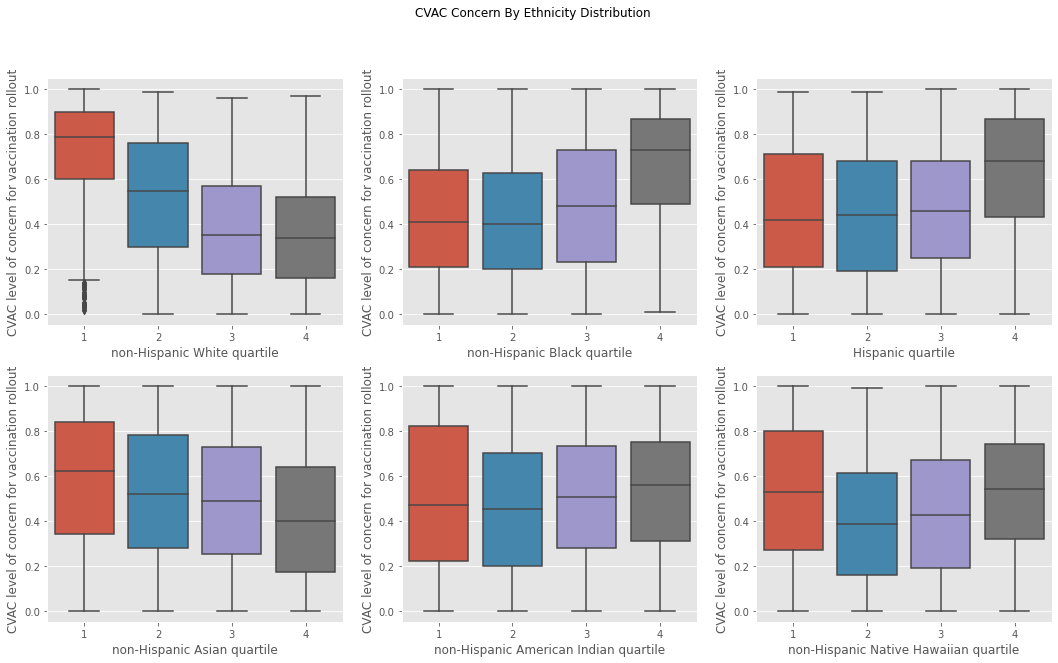

In [81]:
fig, axes = plt.subplots(2,3, figsize =(18,10), sharey = False)
fig.suptitle('CVAC Concern By Ethnicity Distribution')
sns.boxplot(ax =axes[0,0], x='non-Hispanic White quartile', y='CVAC level of concern for vaccination rollout', data=vacc)
sns.boxplot(ax =axes[0,1], x='non-Hispanic Black quartile', y='CVAC level of concern for vaccination rollout', data=vacc)
sns.boxplot(ax =axes[0,2], x='Hispanic quartile', y='CVAC level of concern for vaccination rollout', data=vacc)
sns.boxplot(ax =axes[1,0], x='non-Hispanic Asian quartile', y='CVAC level of concern for vaccination rollout', data=vacc)
sns.boxplot(ax =axes[1,1], x='non-Hispanic American Indian quartile', y='CVAC level of concern for vaccination rollout', data=vacc)
sns.boxplot(ax =axes[1,2], x='non-Hispanic Native Hawaiian quartile', y='CVAC level of concern for vaccination rollout', data=vacc)

In [82]:
vacc.to_csv("Vaccine_Hesitance_2.csv", index= False)

In [85]:
med_cvac = pd.DataFrame([["non-Hispanic White", 0.64, 0.79, 0.84, 0.55, 0.92, 0.35, 1.0, 0.34], ["non-Hispanic Black",\
                  0.0065, 0.41, 0.022, 0.4, 0.098, 0.5, 0.87, 0.74], ["Hispanic", 0.022, 0.41, 0.042, 0.42, 0.096, 0.44, 0.99, 0.68],\
                   ["non-Hispanic Asian", 0.0028, 0.62, 0.006, 0.52, 0.013, 0.5, 0.42, 0.4], ["non-Hispanic American Indian", 0.0012, 0.48, 0.0028, 0.45, 0.007, 0.50, 0.92, 0.55],\
                   ["non-Hispanic Native Hawaiian", 0.0, 0.52, 0.0001, 0.39, 0.0006, 0.41, 0.27, 0.52]], columns =\
                   ['Ethnicity','25%Q', 'Median CVAC', '50%Q', 'Median CVAC', '75%Q', 'Median CVAC', 'Max', 'Median CVAC'])                                               

In [90]:
med_cvac

,25%Q,Median CVAC,50%Q,Median CVAC,75%Q,Median CVAC,Max,Median CVAC
Ethnicity,,,,,,,,
non-Hispanic White,0.6400,0.79,0.8400,0.55,0.9200,0.35,1.00,0.34
non-Hispanic Black,0.0065,0.41,0.0220,0.40,0.0980,0.50,0.87,0.74
Hispanic,0.0220,0.41,0.0420,0.42,0.0960,0.44,0.99,0.68
non-Hispanic Asian,0.0028,0.62,0.0060,0.52,0.0130,0.50,0.42,0.40
non-Hispanic American Indian,0.0012,0.48,0.0028,0.45,0.0070,0.50,0.92,0.55
non-Hispanic Native Hawaiian,0.0000,0.52,0.0001,0.39,0.0006,0.41,0.27,0.52


<AxesSubplot:xlabel='Percent Hispanic', ylabel='Unsure'>

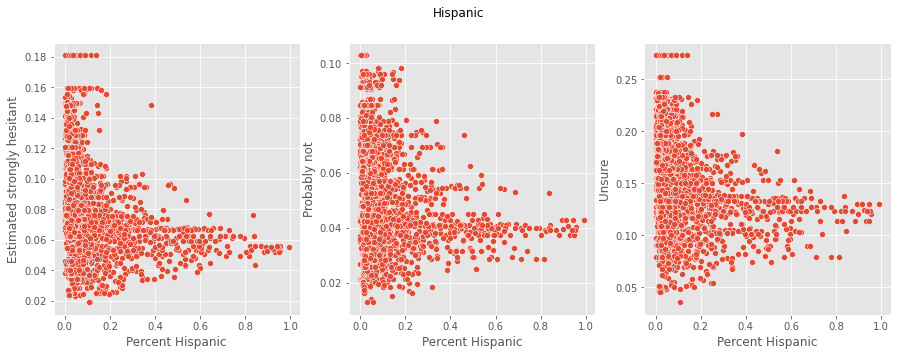

In [13]:
fig, axes = plt.subplots(1,3, figsize =(15,5), sharey =False)
fig.suptitle('Hispanic')
sns.scatterplot(data=vacc, ax =axes[0], x="Percent Hispanic", y="Estimated strongly hesitant")
sns.scatterplot(data=vacc, ax =axes[1], x="Percent Hispanic", y="Probably not")
sns.scatterplot(data=vacc, ax =axes[2], x="Percent Hispanic", y="Unsure")

<AxesSubplot:xlabel='Percent non-Hispanic Black', ylabel='Percent adults fully vaccinated against COVID-19'>

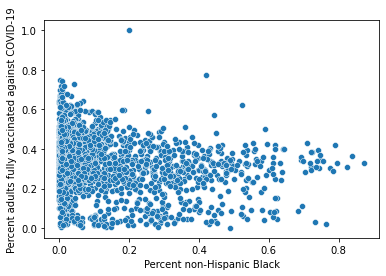

In [6]:
sns.scatterplot(data=vacc, x="Percent non-Hispanic Black", y="Percent adults fully vaccinated against COVID-19")

<AxesSubplot:xlabel='Percent non-Hispanic Black', ylabel='CVAC level of concern for vaccination rollout'>

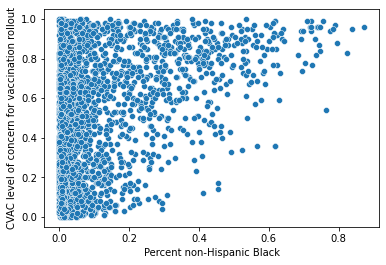

In [24]:
sns.scatterplot(data=vacc, x= "Percent non-Hispanic Black", y="CVAC level of concern for vaccination rollout")

<AxesSubplot:xlabel='Percent non-Hispanic Black', ylabel='Social Vulnerability Index (SVI)'>

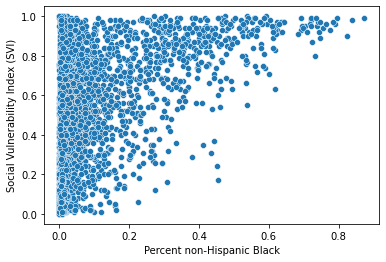

In [25]:
sns.scatterplot(data=vacc, x= "Percent non-Hispanic Black", y="Social Vulnerability Index (SVI)")

<AxesSubplot:xlabel='Percent Hispanic', ylabel='Percent adults fully vaccinated against COVID-19'>

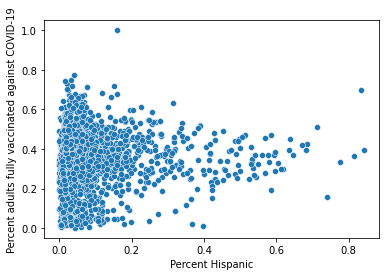

In [7]:
sns.scatterplot(data=vacc, x="Percent Hispanic", y="Percent adults fully vaccinated against COVID-19")

<AxesSubplot:xlabel='Percent non-Hispanic White', ylabel='Percent adults fully vaccinated against COVID-19'>

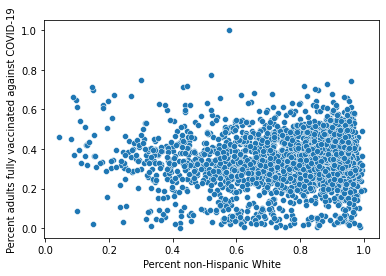

In [10]:
sns.scatterplot(data=vacc, x="Percent non-Hispanic White", y="Percent adults fully vaccinated against COVID-19")

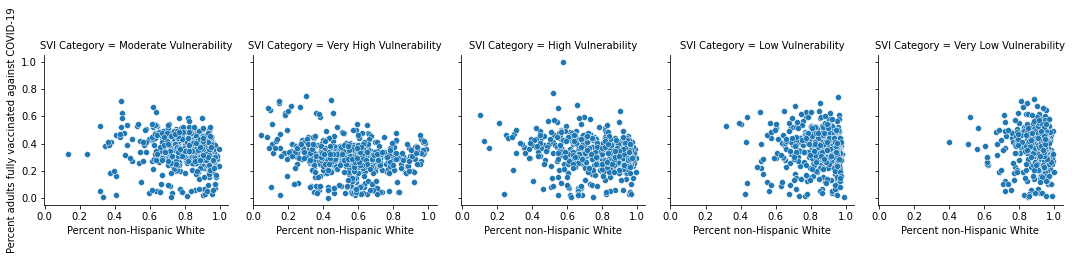

In [13]:
g = sns.FacetGrid(vacc, col="SVI Category")
g.map(sns.scatterplot, "Percent non-Hispanic White", "Percent adults fully vaccinated against COVID-19")

<AxesSubplot:xlabel='Percent non-Hispanic White', ylabel='Social Vulnerability Index (SVI)'>

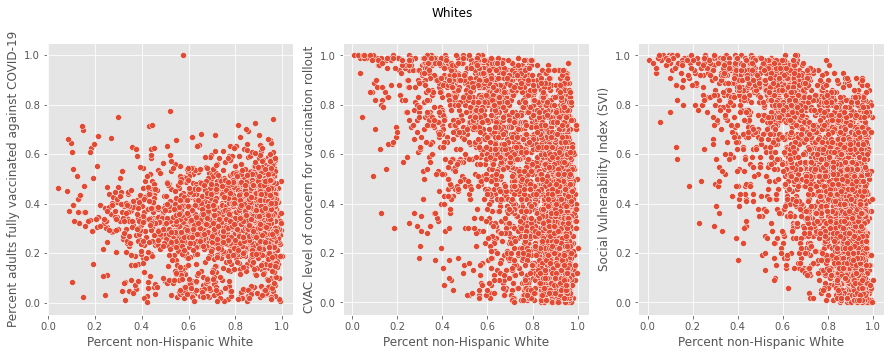

In [33]:
fig, axes = plt.subplots(1,3, figsize =(15,5), sharey =False)
fig.suptitle('Whites')
sns.scatterplot(data=vacc, ax =axes[0], x="Percent non-Hispanic White", y="Percent adults fully vaccinated against COVID-19")
sns.scatterplot(data=vacc, ax =axes[1], x="Percent non-Hispanic White", y="CVAC level of concern for vaccination rollout")
sns.scatterplot(data=vacc, ax =axes[2], x="Percent non-Hispanic White", y="Social Vulnerability Index (SVI)")

<AxesSubplot:xlabel='Percent non-Hispanic Black', ylabel='Social Vulnerability Index (SVI)'>

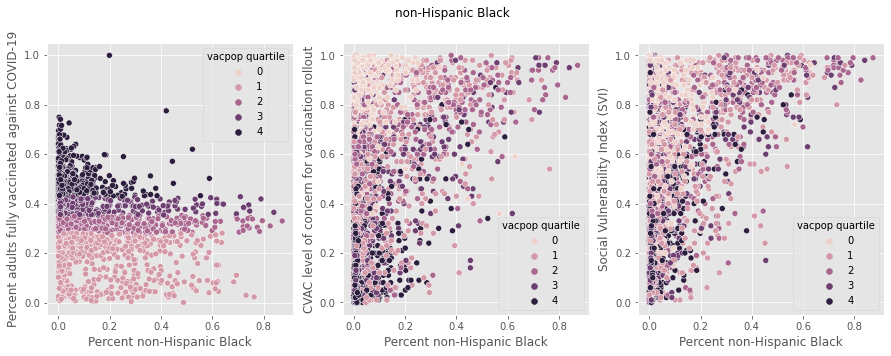

In [97]:
fig, axes = plt.subplots(1,3, figsize =(15,5), sharey =False)
fig.suptitle('non-Hispanic Black')
sns.scatterplot(data=vacc, ax =axes[0], x="Percent non-Hispanic Black", y="Percent adults fully vaccinated against COVID-19", hue = "vacpop quartile")
sns.scatterplot(data=vacc, ax =axes[1], x="Percent non-Hispanic Black", y="CVAC level of concern for vaccination rollout", hue = "vacpop quartile")
sns.scatterplot(data=vacc, ax =axes[2], x="Percent non-Hispanic Black", y="Social Vulnerability Index (SVI)", hue = "vacpop quartile")

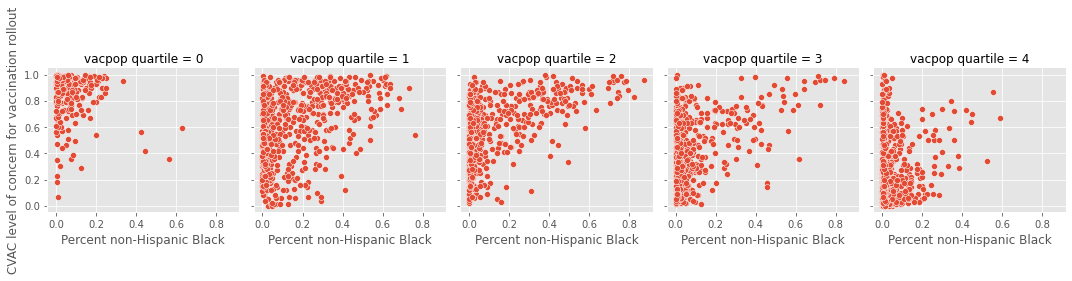

In [99]:
g = sns.FacetGrid(vacc, col="vacpop quartile")
g.map(sns.scatterplot, "Percent non-Hispanic Black", "CVAC level of concern for vaccination rollout")

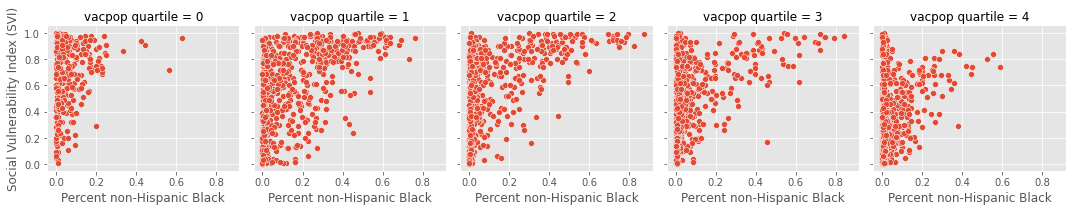

In [100]:
g = sns.FacetGrid(vacc, col="vacpop quartile")
g.map(sns.scatterplot, "Percent non-Hispanic Black", "Social Vulnerability Index (SVI)")

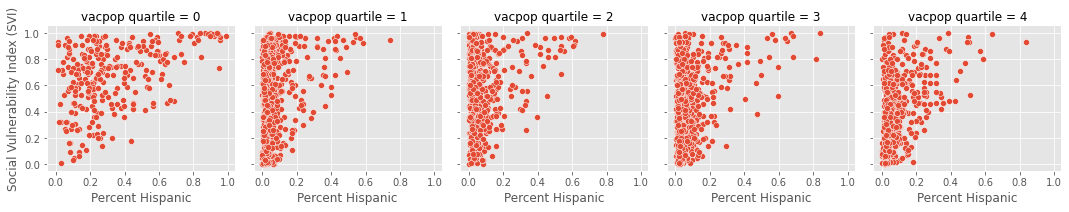

In [101]:
g = sns.FacetGrid(vacc, col="vacpop quartile")
g.map(sns.scatterplot, "Percent Hispanic", "Social Vulnerability Index (SVI)")

In [ ]:
g = sns.FacetGrid(vacc, col="vacpop quartile")
g.map(sns.scatterplot, "Percent Hispanic", "Social Vulnerability Index (SVI)")

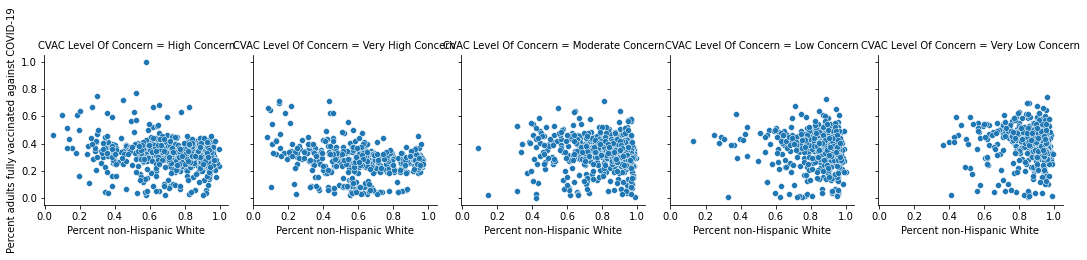

In [14]:
g = sns.FacetGrid(vacc, col="CVAC Level Of Concern")
g.map(sns.scatterplot, "Percent non-Hispanic White", "Percent adults fully vaccinated against COVID-19")

In [5]:
# h = sns.FacetGrid(vacc, col = "State")
# h.map(sns.scatterplot, "Percent non-Hispanic White", "Percent adults fully vaccinated against COVID-19")

In [15]:
vacc.rename(columns={'Estimated strongly hesitant':'Definitely Not'})

,FIPS Code,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Definitely Not,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,...,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary
0,1079,"Lawrence County, Alabama",ALABAMA,0.1913,0.2762,0.0999,0.50,Moderate Vulnerability,0.80,High Concern,...,0.0219,0.0560,0.0020,0.1058,0.0008,0.7649,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.529795 34.518525, -87.5297...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
1,1107,"Pickens County, Alabama",ALABAMA,0.1825,0.2688,0.0917,0.92,Very High Vulnerability,0.78,High Concern,...,0.0487,0.0014,0.0006,0.3984,0.0006,0.5365,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.29705899999999 33.349083, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
2,1035,"Conecuh County, Alabama",ALABAMA,0.1915,0.2943,0.0963,0.81,Very High Vulnerability,0.89,Very High Concern,...,0.0068,0.0020,0.0045,0.4776,0.0000,0.5005,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.165662 31.542897, -87.1653...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
3,4021,"Pinal County, Arizona",ARIZONA,0.1422,0.2077,0.0877,0.86,Very High Vulnerability,0.87,Very High Concern,...,0.3016,0.0430,0.0158,0.0408,0.0029,0.5679,POINT (-111.664616 34.293239),AZ,"MULTIPOLYGON (((-111.685911 33.204637, -111.61...",MULTIPOLYGON (((-114.516842 33.027885999999995...
4,1067,"Henry County, Alabama",ALABAMA,0.1929,0.2871,0.0996,0.55,Moderate Vulnerability,0.65,High Concern,...,0.0262,0.0018,0.0040,0.2655,0.0010,0.6917,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-85.415774 31.490413, -85.4153...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,55109,"St. Croix County, Wisconsin",WISCONSIN,0.0917,0.1380,0.0628,0.01,Very Low Vulnerability,0.09,Very Low Concern,...,0.0240,0.0019,0.0097,0.0080,0.0000,0.9391,POINT (-89.732969 44.639954),WI,"MULTIPOLYGON (((-92.792581 45.078793999999995,...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825..."
3138,55121,"Trempealeau County, Wisconsin",WISCONSIN,0.0991,0.1530,0.0690,0.28,Low Vulnerability,0.31,Low Concern,...,0.0840,0.0034,0.0043,0.0051,0.0000,0.8953,POINT (-89.732969 44.639954),WI,"MULTIPOLYGON (((-91.529034 44.422101, -91.5292...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825..."
3139,55087,"Outagamie County, Wisconsin",WISCONSIN,0.0943,0.1434,0.0652,0.10,Very Low Vulnerability,0.04,Very Low Concern,...,0.0431,0.0148,0.0345,0.0139,0.0003,0.8753,POINT (-89.732969 44.639954),WI,"MULTIPOLYGON (((-88.738565 44.316038, -88.7385...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825..."
3140,55103,"Richland County, Wisconsin",WISCONSIN,0.0986,0.1520,0.0688,0.31,Low Vulnerability,0.46,Moderate Concern,...,0.0232,0.0038,0.0071,0.0088,0.0000,0.9459,POINT (-89.732969 44.639954),WI,"MULTIPOLYGON (((-90.668478 43.466273, -90.6684...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825..."


In [ ]:
# Histogram plotted 

In [ ]:
sorted_group=vacc['Percent adults fully vaccinated against COVID-19'].median()
sns.boxplot(x='State', y='Percent adults fully vaccinated against COVID-19', data=vacc)

Text(0, 0.5, 'Percent adults fully vaccinated against COVID-19')

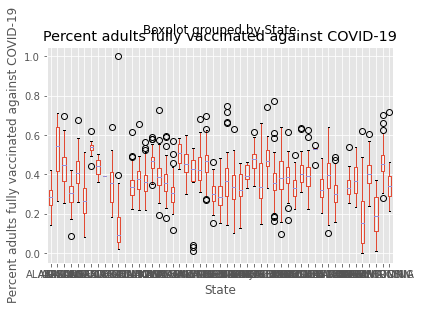

In [13]:
vacc_percent = vacc[['State', 'Percent adults fully vaccinated against COVID-19']]
vacc_percent.boxplot(by='State', column='Percent adults fully vaccinated against COVID-19')
plt.ylabel('Percent adults fully vaccinated against COVID-19')

In [ ]:
vacc['text'] = 'Fully vaccinated' + vacc['Percent adults fully vaccinated against COVID-19'].astype(str) + 'State' + vacc['State Code']
data = [dict(type = 'choropleth', autocolorscale=False, locations=vacc['State Code'], locationmode = 'US States', text = vacc['text'], colorscale ='custom-colorscale',\
            colorbar =dict(title= 'Percent fully vaccinated'))]
data

In [ ]:
layout = dict(title = 'Percent fully vaccinated', geo =dict(scope ='USA', projection =dict(type ='albers usa'), showlakes =True, lakecolor ='rgb(66, 165, 245)',),)
layout

In [ ]:
fig = dict(data =data, layout =layout)
py.iplot(fig, filename ='d3-choropleth-map')

In [ ]:
# Histogram showing percent adults fully vaccinated against Covid-19

px.histogram(vacc, x="Percent adults fully vaccinated against COVID-19", hover_data=vacc.columns)

# hist_data = list(vacc['Percent adults fully vaccinated against COVID-19'])
# group_labels = ['distplot'] # name of the dataset

# fig = ff.create_distplot(hist_data, group_labels)
# fig.show()

In [ ]:
#Calculated median accounting for nan values
np.nanmedian(vacc["Percent adults fully vaccinated against COVID-19"])

In [ ]:
vacc["Percent adults fully vaccinated against COVID-19"].describe()

In [ ]:
#get quartiles
q1, q2, q3 = vacc["Percent adults fully vaccinated against COVID-19"].quantile(q=[0.25,0.5,0.75])

#create conditions
conditions =[\
    (vacc["Percent adults fully vaccinated against COVID-19"]<=q1),\
    (vacc["Percent adults fully vaccinated against COVID-19"]>q1) & (vacc["Percent adults fully vaccinated against COVID-19"]<=q2),\
    (vacc["Percent adults fully vaccinated against COVID-19"]>q2) & (vacc["Percent adults fully vaccinated against COVID-19"]<=q3),\
    (vacc["Percent adults fully vaccinated against COVID-19"]>q3) 
            ]
values = [1, 2, 3, 4]
vacc['vacpop quartile'] =np.select(conditions, values)